In [ ]:
# Works best with jupyter-notebook

In [1]:
%matplotlib notebook 
#%matplotlib widget 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import math
import numpy as np

from roboticstoolbox import *
import roboticstoolbox as rtb

from spatialmath import *
from spatialmath.base import *
import spatialmath.base.symbolic as sym

import matplotlib.pyplot as plt
np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

# Lecture 5.8

Denavit-Hartenberg parameterisation only uses 4 numbers to desribe each joint. 

Let's study DH parameters usin a 2-link planar robot model. We have 2 links (though the base is referred as link 0) and 2 joints. 

In [2]:
robot = rtb.models.DH.Planar2()
print(robot)

┏━━━━┳━━━━━┳━━━━┳━━━━━━┓
┃θⱼ  ┃ dⱼ  ┃ aⱼ ┃  ⍺ⱼ  ┃
┣━━━━╋━━━━━╋━━━━╋━━━━━━┫
┃ q1 ┃ 0.0 ┃  1 ┃ 0.0° ┃
┃ q2 ┃ 0.0 ┃  1 ┃ 0.0° ┃
┗━━━━┻━━━━━┻━━━━┻━━━━━━┛

┌─────┬──────┬──────┐
│name │ q0   │ q1   │
├─────┼──────┼──────┤
│  qz │  0°  │  0°  │
│  q1 │  0°  │  90° │
│  q2 │  90° │ -90° │
└─────┴──────┴──────┘



<IPython.core.display.Javascript object>


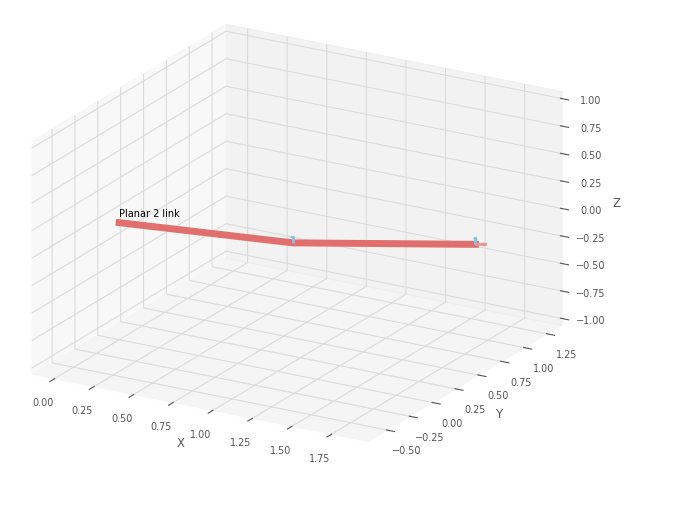

RuntimeError: cannot use teach panel under Jupyter

In [4]:
import matplotlib; #matplotlib.use("nbAgg") 
from mpl_toolkits.mplot3d import Axes3D

robot.q=[0.2, 0.3]
robot.teach();

Given a set of joint anles, we can then capture the pose of the end-effector of the robot

In [5]:
print(robot.fkine(robot.q))

   0.877583   -0.479426    0           1.85765      
   0.479426    0.877583    0           0.678095     
   0           0           1           0            
   0           0           0           1            



If we want each of the individual Homogenous transformations from one joint to the next, you can use fkine_all()

In [6]:
print(robot.fkine_all(robot.q))

[0] =
   0.980067   -0.198669    0           0.980067     
   0.198669    0.980067    0           0.198669     
   0           0           1           0            
   0           0           0           1            
[1] =
   0.877583   -0.479426    0           1.85765      
   0.479426    0.877583    0           0.678095     
   0           0           1           0            
   0           0           0           1            



### Puma 560 Model
Now, let's look at the 6 DOF puma 560 model.

In [9]:
robot = rtb.models.DH.Puma560()
print(robot)

┏━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓
┃θⱼ  ┃         dⱼ         ┃   aⱼ   ┃   ⍺ⱼ   ┃   q⁻    ┃   q⁺   ┃
┣━━━━╋━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━╋━━━━━━━━╋━━━━━━━━━╋━━━━━━━━┫
┃ q1 ┃ 0.6718299999999999 ┃      0 ┃  90.0° ┃ -160.0° ┃ 160.0° ┃
┃ q2 ┃                  0 ┃ 0.4318 ┃   0.0° ┃ -110.0° ┃ 110.0° ┃
┃ q3 ┃            0.15005 ┃ 0.0203 ┃ -90.0° ┃ -135.0° ┃ 135.0° ┃
┃ q4 ┃             0.4318 ┃      0 ┃  90.0° ┃ -266.0° ┃ 266.0° ┃
┃ q5 ┃                  0 ┃      0 ┃ -90.0° ┃ -100.0° ┃ 100.0° ┃
┃ q6 ┃                  0 ┃      0 ┃   0.0° ┃ -266.0° ┃ 266.0° ┃
┗━━━━┻━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━┻━━━━━━━━┻━━━━━━━━━┻━━━━━━━━┛

┌─────┬─────┬──────┬───────┬─────┬──────┬─────┐
│name │ q0  │ q1   │ q2    │ q3  │ q4   │ q5  │
├─────┼─────┼──────┼───────┼─────┼──────┼─────┤
│  qz │  0° │  0°  │  0°   │  0° │  0°  │  0° │
│  qr │  0° │  90° │ -90°  │  0° │  0°  │  0° │
│  qs │  0° │  0°  │ -90°  │  0° │  0°  │  0° │
│  qn │  0° │  45° │  180° │  0° │  45° │  0° │
└─────┴─────┴

Defined joint configurations are:
- qz, zero joint angle configuration, ‘L’ shaped configuration
- qn, arm is at a nominal non-singular configuration
- qr, vertical ‘READY’ configuration
- qs, arm is stretched out in the x-direction

[       0        0        0        0        0        0]


<IPython.core.display.Javascript object>


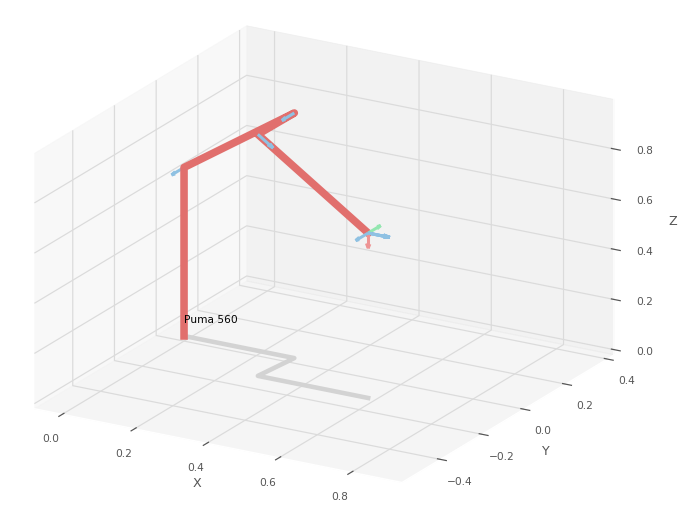

In [10]:
print(robot.qz)
robot.plot(robot.qz);

In [14]:
# Arm in non-singular config
print(robot.qn)
robot.plot(robot.qn);

[       0   0.7854    3.142        0   0.7854        0]


In [12]:
# Upwards in the ready position
print(robot.qn)
robot.plot(robot.qr);

[       0   0.7854    3.142        0   0.7854        0]


In [13]:
# Stretched in the x-direction
print(robot.qs)
robot.plot(robot.qs);

[       0        0   -1.571        0        0        0]


You can also arbitrarily assign the values of the joint angles to produce a particular end-effector pose in Homogenous transformation form.

In [15]:
T = robot.fkine([0.1, 0.2, 0.3, 0, 0, 0])
print(T)

   0.873198   -0.0998334  -0.47703     0.247803     
   0.0876121   0.995004   -0.0478627  -0.12594      
   0.479426    0           0.877583    1.14629      
   0           0           0           1            



# Student Exercise... 
Explore how different joint angle configurations affects the end-effector position and orientation of the robot's end-effector.